# Исследование компьютерных игр

**Пути к файлу**

`/datasets/games.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/games.csv);

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from math import factorial
from scipy import stats as st

In [2]:
try:
    data = (
        pd.read_csv('/datasets/games.csv')
        
    )

except:
    data = (
        pd.read_csv('games.csv')
        
    )

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В ходе первичного ознакомления с данными было установлено:**

1) названия столбцов нужно привести к нижнему регистру;

2) пропуски нужно обработать, а также проверить данные на наличие дубликатов;

3) изменить тип данных в столбцах:  Year_of_Release, User_Score

#### Шаг 2. Предобработка данных

Приводим названия столбцов к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Далее проверим данные на наличие пропусков и дубликатов.

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data['year_of_release'].isna().sum()

269

In [9]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
drop = (data['year_of_release'].isna().sum() / len(data['year_of_release'])).round(4) * 100
print('Процент пропущенных значений в столбце year_of_release:', drop.round(2))

Процент пропущенных значений в столбце year_of_release: 1.61


Пропущенных значений немного и их нельзя ничем заполнить, поэтому пропуски лучше удалить. + Поменять тип данных на int.

In [11]:
data = data.dropna(subset = ['year_of_release']).reset_index(drop=True)

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [13]:
data['year_of_release'].isna().sum()

0

In [14]:
data['user_score'].isna().sum()

6607

In [15]:
drop1 = (data['user_score'].isna().sum() / len(data['user_score'])).round(4) * 100
print('Процент пропущенных значений в столбце user_score:', drop1.round(2))

Процент пропущенных значений в столбце user_score: 40.17


In [16]:
drop2 = (data['critic_score'].isna().sum() / len(data['critic_score'])).round(4) * 100
print('Процент пропущенных значений в столбце critic_score:', drop2.round(2))

Процент пропущенных значений в столбце critic_score: 51.46


40% и 51% слишком много, от данных избавляться нельзя. 
Можно было бы заменить пропуски в user_score медианным значением по столбцу critic_score, однако там тоже много пропусков.
Оставляем пропуски.

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Акроним служит для отметки неясностей или пропусков, которые надо заполнить, поэтому переведем его в NaN.

In [18]:
data['user_score'].replace('tbd', np.nan, inplace=True)

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Далее изменим тип данных в user_score на float.

In [20]:
pd.to_numeric(data['user_score'], errors='coerce')

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16441    NaN
16442    NaN
16443    NaN
16444    NaN
16445    NaN
Name: user_score, Length: 16446, dtype: float64

In [21]:
data['user_score']=data['user_score'].astype('float')

In [22]:
data['user_score'].isna().sum()

8983

In [23]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Добавляем новый столбец: мировые продажи как сумма продаж в Северной Америке, Европе, Японии и других странах.

In [24]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [25]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

Следует проверить явные и неявные дубликаты + удалить по два пропуска в name и genre.

In [26]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Проверим наличие полных дубликатов, где информация совпадала бы по имени, платформе и году выпуска.

In [27]:
data[['name', 'platform', 'year_of_release']].duplicated().any().sum()

1

In [28]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

In [29]:
data[['name', 'platform', 'year_of_release']].duplicated().any().sum()

0

In [30]:
data['name'].isna().sum()

1

In [31]:
data.dropna(subset=['name'], inplace=True)

In [32]:
data['genre'].isna().sum()

0

In [33]:
data['name'].isna().sum()

0

In [34]:
sorted(data['name'], key=lambda x: x.lower())

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: Quantum of Solace',
 '007: Quantum of Solace',
 '007: Quantum of Solace',
 '007: Quantum of Solace',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party

Пропуски в столбце rating заменим на whithout_rat.

In [35]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [36]:
print('Процент пропущенных значений в столбце rating:', 
      (data['rating'].isna().sum() / len(data['rating']) * 100).round(2))

Процент пропущенных значений в столбце rating: 40.6


In [37]:
data['rating'].replace(np.nan, 'whithout_rat', inplace=True)

In [38]:
data['rating'].unique()

array(['E', 'whithout_rat', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**В ходе предообработки данных:**

1) названия столбцов приведены к нижнему регистру;

2) преобразованы данные в нужный тип: year_of_release в int, user_score в float;

3) удалены пропуски в столбцах name, genre, year_of_release;

4) удалены полные дубликаты;

5) добавлен новый столбец all_sales (количество мировых продаж);

6) в столбце rating пропуски заменены на Without_rat


#### Шаг 3. Проведите исследовательский анализ данных

In [39]:
matplotlib.style.use('seaborn-pastel')

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

Text(0, 0.5, 'Количество релизов')

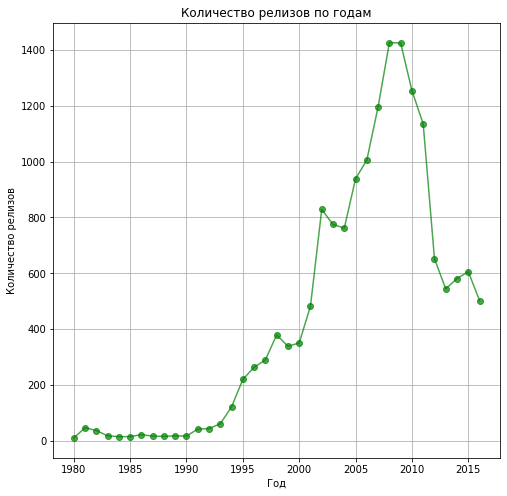

In [40]:
data.groupby('year_of_release')['year_of_release'].count().plot(title = 'Количество релизов по годам',style='o-', grid=True, 
                figsize=(8,8), alpha=0.7, color='green')

plt.xlabel('Год')
plt.ylabel('Количество релизов')

Резкий прирост количества выпускаемых компьютерных игр наблюдается, начиная с 2000 года.

Данные за более ранний период можно не учитывать.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

Сначала определим топ 5 платформ по количеству продаж.

In [41]:
top = data.pivot_table(index='platform', values='all_sales', 
                            aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)[:5]

In [42]:
top

,platform,all_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78


<Figure size 432x288 with 0 Axes>

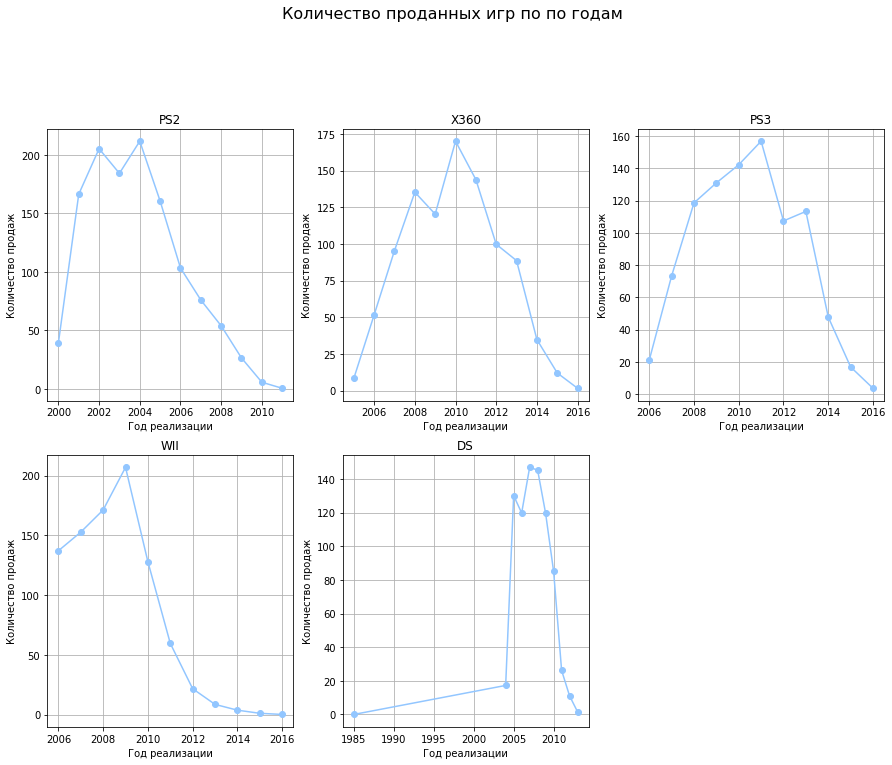

In [43]:
d = 0
top_plat = top['platform']
plt.subplots_adjust(hspace=1, wspace=1,)
plt.figure(figsize=[15, 17])
plt.suptitle('Количество проданных игр по по годам', fontsize=16)

for name in top_plat:
    d += 1
    plat_pvt = data.query('platform == @name').pivot_table(index='year_of_release', 
                                                                       values='all_sales', aggfunc='sum')
    
    plt.subplot(3, 3, d)
    plt.title(f'{name.upper()}')
    plt.plot(plat_pvt, 'o-', label='Количество проданных копий')
    plt.grid(True)
    plt.legend=(False)
    plt.ylabel('Количество продаж')
    plt.xlabel('Год реализации')
        


plt.show()

Судя по графику, DS существует с 1985 года (что ее резко выделяет среди других представленных на графиках платформ), но серьезный рост продаж произошел в 2004 году. Предположу, что это связано с выпуском Nintendo DS.

В среднем платформа активна около 10 лет, при этом сюда входит и период подъема и период спада. Высокая динамичность на рынке при этом занимает около 3 лет.
Актуальный период можно взять, начиная с 2014 года включительно.

In [44]:
data_new = data.query('year_of_release>=2014')

In [45]:
data_new['year_of_release'].unique()

array([2015, 2014, 2016])

In [46]:
data_new['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

Сначала я решила построить график распределения платформ по количеству продаж за актуальный период, а затем график, который показывает динамику развития платформ.

          all_sales
platform           
3DS           86.68
PC            27.05
PS3           68.18
PS4          288.15
PSP            0.36
PSV           22.40
Wii            5.07
WiiU          42.98
X360          48.22
XOne         140.36


Text(0.5, 0, 'Продажи')

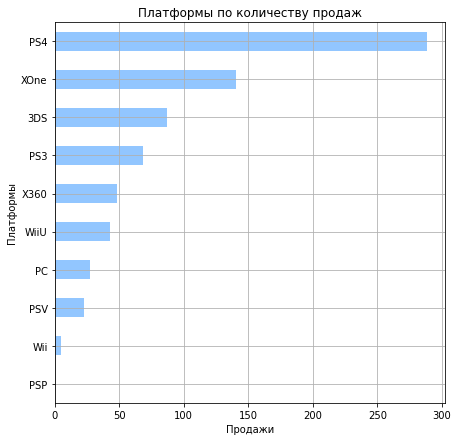

In [47]:
print(data_new.pivot_table(index='platform', 
                     values='all_sales', 
                     aggfunc='sum'))
data_new.pivot_table(index='platform', 
                     values='all_sales', 
                     aggfunc='sum').reset_index().sort_values(by='all_sales', 
                    ascending=True).plot(kind='barh', 
                    x = 'platform', y = 'all_sales', figsize=(7,7), legend=False, grid=True)
plt.title('Платформы по количеству продаж')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
                                                                                                            

year_of_release    2014    2015   2016
platform                              
3DS               43.76   27.78  15.14
PC                13.28    8.52   5.25
PS3               47.76   16.82   3.60
PS4              100.00  118.90  69.25
PSP                0.24    0.12    NaN
PSV               11.90    6.25   4.25
Wii                3.75    1.14   0.18
WiiU              22.03   16.35   4.60
X360              34.74   11.96   1.52
XOne              54.07   60.14  26.15


Text(0, 0.5, 'Продажи копий в милионах')

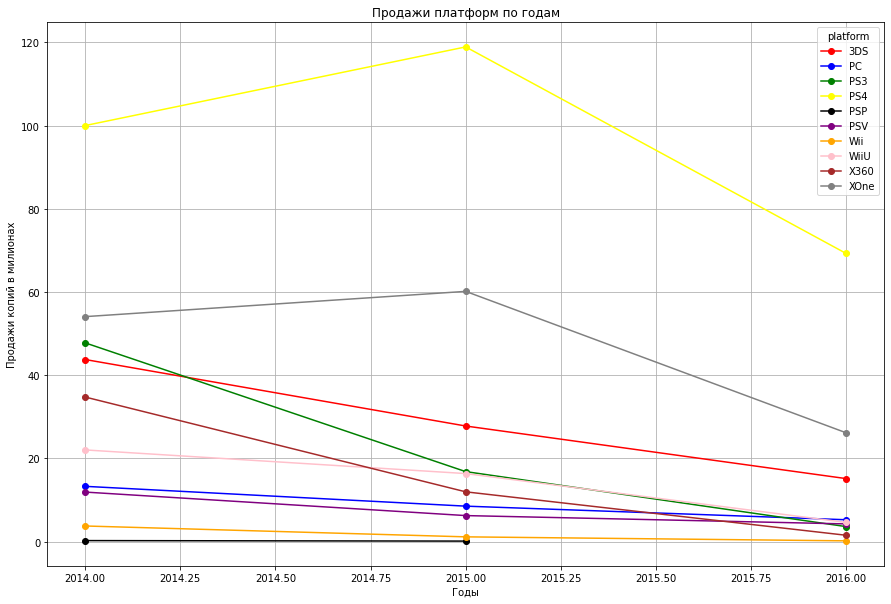

In [48]:
print(data_new.pivot_table(index='platform', columns='year_of_release', values='all_sales',
aggfunc='sum'))
colormap = plt.cm.gist_ncar
data_new.pivot_table(index='platform', columns='year_of_release', values='all_sales',
aggfunc='sum').T.plot(figsize=(15,10), grid=True,style='o-', 
                      title='Продажи платформ по годам', color=('red', 'blue', 'green', 
                                                                'yellow', 'black', 'purple', 
                                                                'orange', 'pink', 'brown', 'grey'))

plt.xlabel('Годы')
plt.ylabel('Продажи копий в милионах')

В целом, у всех платформ к 2016 году наблюдается спад продаж. Но более менее активной остается PS4, ее можно назвать перспективной платформой. Еще можно указать XOne, она, хоть и меньше, но принесла продажи в 2016 году.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

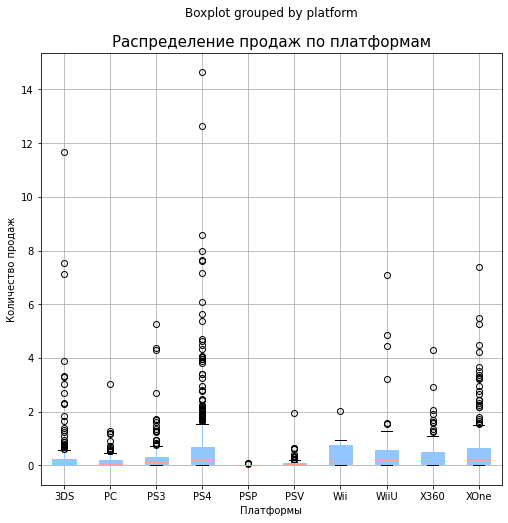

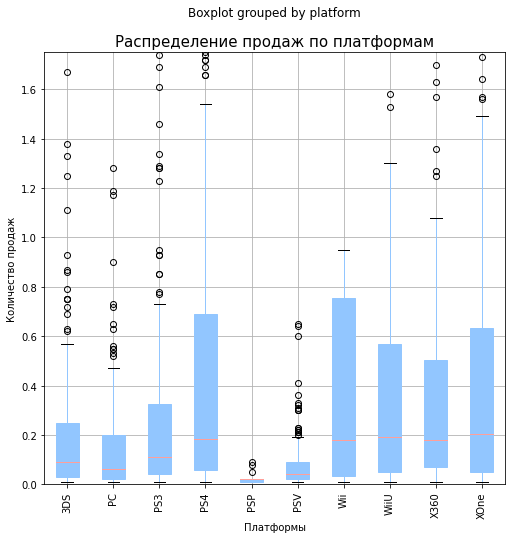

In [49]:
data_new.boxplot(by='platform', column='all_sales', figsize=(8,8), patch_artist = True, return_type='both')
plt.xlabel("Платформы")
plt.ylabel("Количество продаж")
plt.title('Распределение продаж по платформам', fontsize=15)

plt.show()

data_new.boxplot(by='platform', column='all_sales', figsize=(8,8), patch_artist = True, return_type='both')
plt.xticks(rotation=90)
plt.xlabel("Платформы")
plt.ylabel("Количество продаж")
plt.title('Распределение продаж по платформам', fontsize=15)
plt.ylim(0,1.75)
plt.show()

У платформ XOne и WiiU почти не наблюдается выбросов, у остальных платформ есть аномальные значения, особенно у Wii, X360, PS3.
Возможно, количество выбросов можно объяснить продажами популярных игр или релизами ожидаемых игр.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Определим топ-5 популярных платформ после 2014 года.

In [50]:
top_new = data_new.pivot_table(index='platform', values='all_sales', 
                            aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)[:5]
top_new

,platform,all_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22


Для анализа возьмем PS4.

Вначале я изучила корреляцию в целом между отзывами пользователей и критиков и продажами, а затем уже конкретно проанализировала одну платформу.

In [51]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,whithout_rat,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,whithout_rat,31.38


In [52]:
data_new.corr()['user_score']['all_sales']

-0.013070305002483143

In [53]:
data_new.corr()['critic_score']['all_sales']

0.32810508696636437

In [54]:
data_new['critic_score'].unique()

array([nan, 97., 82., 83., 85., 87., 88., 76., 93., 81., 86., 84., 77.,
       80., 92., 70., 72., 75., 66., 78., 89., 73., 90., 74., 71., 79.,
       68., 63., 61., 64., 91., 69., 96., 62., 55., 95., 67., 65., 50.,
       60., 56., 58., 46., 59., 57., 48., 32., 54., 47., 53., 51., 49.,
       45., 39., 19., 44., 43., 20., 36., 40., 42., 25., 35., 52., 31.,
       26.])

In [55]:
data_new['user_score'].unique()

array([nan, 8.3, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.1, 6.4, 3.4,
       8.5, 4.8, 4.9, 4.5, 6.2, 8.4, 6.3, 7.7, 9.2, 7.6, 8.7, 6.7, 7. ,
       4.1, 8.2, 6.8, 5.5, 7.5, 4.4, 5.9, 7.2, 6.9, 3.9, 4.2, 3.2, 8.6,
       3.1, 9. , 7.3, 7.4, 6. , 4.7, 7.1, 8.8, 5.1, 6.6, 3. , 5.8, 2.9,
       8.9, 2.7, 8. , 3.5, 7.8, 5.2, 5.6, 4.6, 3.3, 9.3, 4. , 3.6, 3.7,
       2.4, 2.8, 5.3, 1.7, 1.6, 3.8, 1.5, 0.7, 2.5, 2. , 2.1, 0.2, 1.9,
       1.4, 2.3])

Между продажами и отзывами нет большой корреляции, посмотрим на примере конкретной платформы.

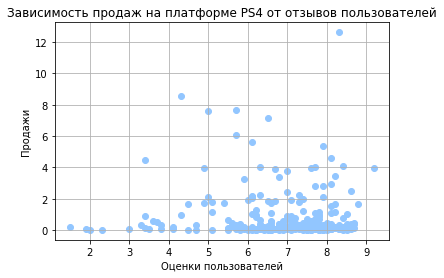

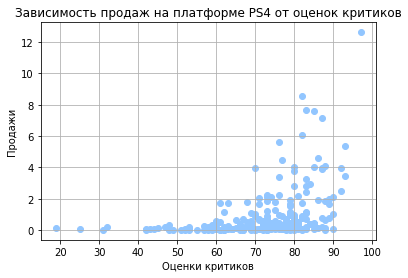

In [56]:
plt.scatter(data=data_new.query('platform=="PS4"'), x='user_score',y='all_sales')
plt.title ('Зависимость продаж на платформе PS4 от отзывов пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.grid(True)

plt.show()

plt.scatter(data=data_new.query('platform=="PS4"'), x='critic_score',y='all_sales')
plt.title ('Зависимость продаж на платформе PS4 от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.grid(True)

Зависимость между отзывами пользователей и продажами незначительна. Можно предположить, что на продажи влияют другие показатели.

Построим диаграмму рассеяния для других популярных платформ.

<Figure size 432x288 with 0 Axes>

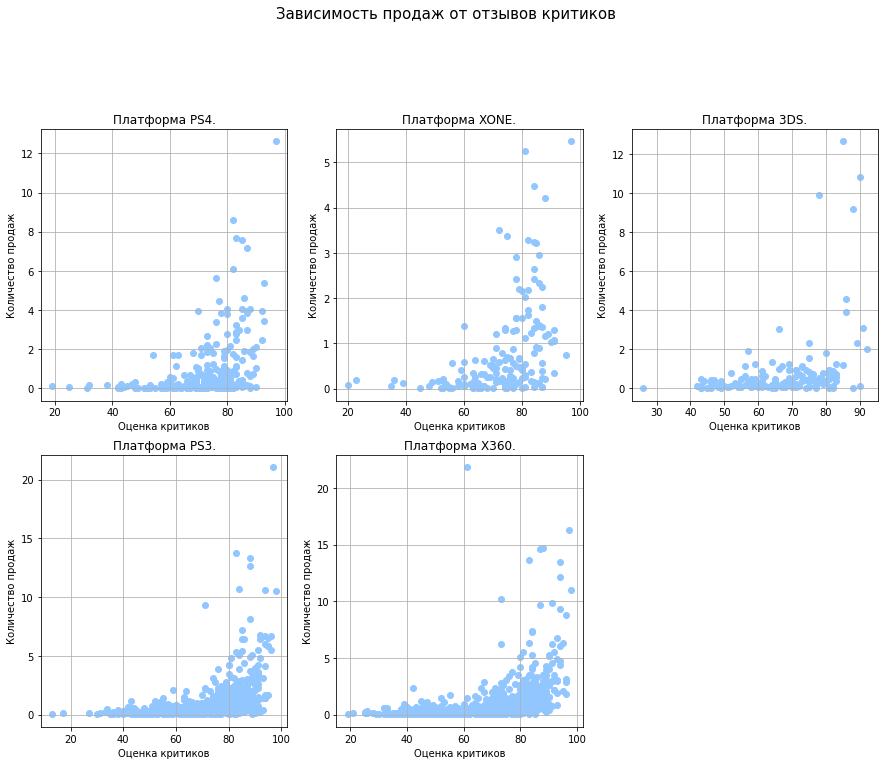

In [57]:
d = 0
top_plat = top_new['platform']

plt.subplots_adjust(hspace=1, wspace=1,)
plt.figure(figsize=[15, 17])
plt.suptitle('Зависимость продаж от отзывов критиков', fontsize=15)

for name in top_plat:
    d += 1
    plat_pvt = data.query('platform == @name')
    
    plt.subplot(3, 3, d)
    plt.title(f'Платформа {name.upper()}.')
    plt.scatter(data=plat_pvt, x='critic_score',y='all_sales')
    plt.grid(True)
    plt.legend=(False)
    plt.ylabel('Количество продаж')
    plt.xlabel('Оценка критиков')

Наблюдается небольшая прямая корреляция между оценкой критиков и продажами: чем оценка выше, тем больше продаж, хотя для разных платформ корреляция разная. Так, более заметная зависимость наблюдается у платформы PS3, менее -  у платформы 3DS.

<Figure size 432x288 with 0 Axes>

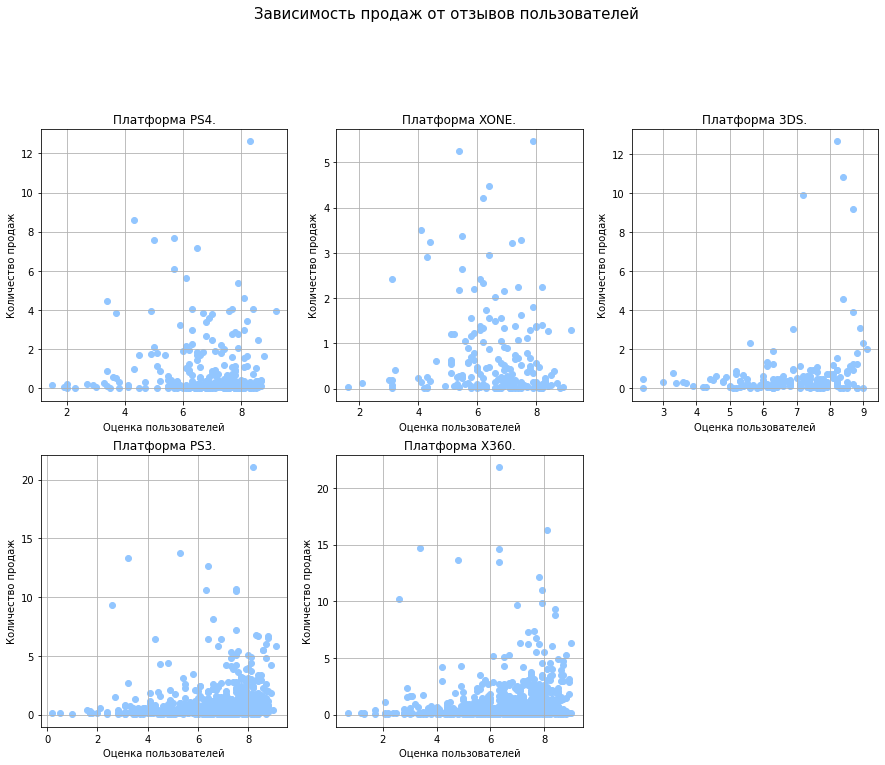

In [58]:
d = 0
top_plat = top_new['platform']

plt.subplots_adjust(hspace=1, wspace=1,)
plt.figure(figsize=[15, 17])
plt.suptitle('Зависимость продаж от отзывов пользователей', fontsize=15)
for name in top_plat:
    d += 1
    plat_pvt = data.query('platform == @name')
    
    plt.subplot(3, 3, d)
    plt.title(f'Платформа {name.upper()}.')
    plt.scatter(data=plat_pvt, x='user_score',y='all_sales')
    plt.grid(True)
    plt.legend=(False)
    plt.ylabel('Количество продаж')
    plt.xlabel('Оценка пользователей')

Наблюдается небольшая прямая корреляция между оценкой пользователей и продажами: чем оценка выше, тем больше продаж, хотя для разных платформ корреляция разная. Так, более заметная зависимость наблюдается у платформ PS3 и X360 , менее -  у платформы 3DS.

In [59]:
correlation_critic=[]
top_name=top_new['platform']
for name in top_name:
    critic = data_new.query('platform==@name')
    correlation_critic.append\
    ({'Коэффициент корреляции между продажами и оценками критиков': data.query('platform == @name and\
    critic_score!=-11').corr()['all_sales']['critic_score'], 'Название платформы': name})

correlation_critic

[{'Коэффициент корреляции между продажами и оценками критиков': 0.40656790206178123,
  'Название платформы': 'PS4'},
 {'Коэффициент корреляции между продажами и оценками критиков': 0.4169983280084021,
  'Название платформы': 'XOne'},
 {'Коэффициент корреляции между продажами и оценками критиков': 0.3487397305984825,
  'Название платформы': '3DS'},
 {'Коэффициент корреляции между продажами и оценками критиков': 0.4337124672233109,
  'Название платформы': 'PS3'},
 {'Коэффициент корреляции между продажами и оценками критиков': 0.39286589254006926,
  'Название платформы': 'X360'}]

In [60]:
correlation_user=[]
top_name=top_new['platform']
for name in top_name:
    user = data_new.query('platform==@name')
    correlation_user.append\
    ({'Коэффициент корреляции между продажами и отзывами пользователей': data.query('platform == @name and\
    critic_score!=-11').corr()['all_sales']['user_score'], 'Название платформы': name})

correlation_user

[{'Коэффициент корреляции между продажами и отзывами пользователей': -0.03195711020455685,
  'Название платформы': 'PS4'},
 {'Коэффициент корреляции между продажами и отзывами пользователей': -0.06892505328279543,
  'Название платформы': 'XOne'},
 {'Коэффициент корреляции между продажами и отзывами пользователей': 0.22207843643390865,
  'Название платформы': '3DS'},
 {'Коэффициент корреляции между продажами и отзывами пользователей': 0.12792603540158298,
  'Название платформы': 'PS3'},
 {'Коэффициент корреляции между продажами и отзывами пользователей': 0.11418661214017993,
  'Название платформы': 'X360'}]

Таким образом, и у отзывов пользователей, и у оценок критиков нет большой корреляции с количеством продаж (при этом, если сравнивать, то более выраженная корреляция у оценок критиков, чем у пользователей).

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

           genre  all_sales
8        Shooter      0.515
10        Sports      0.180
4       Platform      0.140
2       Fighting      0.125
7   Role-Playing      0.110
9     Simulation      0.100
0         Action      0.090
3           Misc      0.090
6         Racing      0.090
11      Strategy      0.060
5         Puzzle      0.045
1      Adventure      0.030


Text(0, 0.5, 'Жанры')

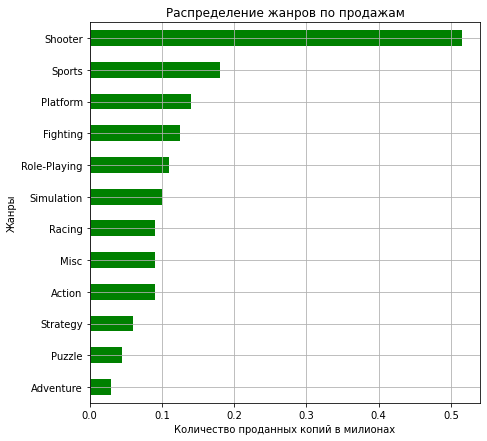

In [61]:
print(data_new.pivot_table(index='genre', 
                     values='all_sales', 
                     aggfunc='median').reset_index().sort_values(by='all_sales', 
                    ascending=False))
data_new.pivot_table(index='genre', 
                     values='all_sales', 
                     aggfunc='median').reset_index().sort_values(by='all_sales', 
                    ascending=True).plot(kind='barh', x='genre', y='all_sales', 
                    figsize=(7,7), legend=False, grid=True, title='Распределение жанров по продажам',color='green')
plt.xlabel('Количество проданных копий в милионах')
plt.ylabel ('Жанры')

По продажам лидируют такие жанры, как: Shooter, Sports, Platform. Причем шутеры очень сильно обгоняют спортивные и платформенные игры. На последнем месте - Adventure, Puzzle, Strategy.

**В результате исследовательского анализа данных было установлено:**

1) абсолютное большинство игр было выпущено после 2000 года;

2) период "жизни" платформы около 10 лет, но период активных продаж – около 3-х лет. Для дальнейшего анализа определен актуальный период: с 2014 года;

3) у всех платформ к 2016 году наблюдается спад продаж. Более-менее активной остается PS4, ее можно назвать перспективной платформой. Еще можно указать XOne, она, хоть и меньше, но принесла продажи в 2016 году.

4) у платформ много аномально высоких значений по продажам. Возможно, это связано с особенностями игровой индустрии, где часто наблюдаются всплески продаж с выходом хитов/ожидаемых/популярных игр;

5) нет большой зависимости между продажами и отзывами пользователей, а также продажами и оценками критиков;

6) по продажам лидируют такие жанры, как: Shooter, Sports, Platform. Причем шутеры очень сильно обгоняют спортивные и платформенные игры. На последнем месте - Adventure, Puzzle, Strategy.


#### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

In [62]:
n_platforms = data_new.pivot_table(index='platform', 
               values='na_sales', aggfunc=sum).sort_values(by='na_sales', ascending=False).reset_index()

n_platforms

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


In [63]:
# другие платформы
other_platforms_list = ['PSP', 'Wii', 'PSV', 'PC', 'WiiU']
other_platform_sales = n_platforms[n_platforms['platform'].isin(other_platforms_list)]['na_sales'].sum()
other_platforms = pd.DataFrame({'platform': ['other_platform'], 'na_sales': [other_platform_sales]})

# платформы, которые оставляем без изменений
common_platforms = n_platforms[~n_platforms['platform'].isin(other_platforms_list)]

# объединяем датафреймы
df_concat = pd.concat([other_platforms, common_platforms], ignore_index=True)

In [64]:
n_p_concat = df_concat.sort_values(by='na_sales', ascending=False)
n_p_concat

,platform,na_sales
1,PS4,98.61
2,XOne,81.27
0,other_platform,31.19
3,X360,28.30
4,3DS,22.64
5,PS3,22.05


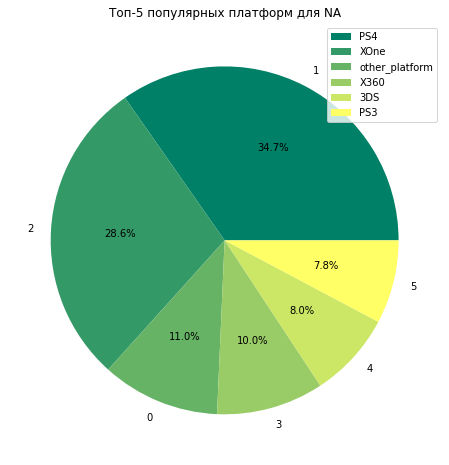

In [65]:
n_p_concat.plot(kind='pie',
                  x='platform',
                  y='na_sales', cmap='summer', figsize=(8,8),autopct='%1.1f%%', 
               title='Топ-5 популярных платформ для NA')

ax = plt.gca()
ax.axes.yaxis.set_visible(False) 
ax.legend(labels=['PS4', 'XOne', 'other_platform', 'X360', '3DS', 'PS3'])

На долю 5 популярных платформ Северной Америки приходятся почти 90% всех продаж в регионе. Более трети занимает PS4. Чуть меньше - XOne. Другие 3 платформы не так популярны.

In [66]:
n_genre = data_new.pivot_table(index='genre', 
               values='na_sales', aggfunc=sum).sort_values(by='na_sales', ascending=False).reset_index()

n_genre

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Fighting,12.43
6,Racing,8.74
7,Platform,6.79
8,Adventure,5.64
9,Simulation,2.63


In [67]:
# другие платформы
other_genre_list = ['Puzzle', 'Strategy', 'Simulation', 'Adventure', 'Platform', 'Racing', 'Fighting']
other_genre_sales = n_genre[n_genre['genre'].isin(other_genre_list)]['na_sales'].sum()
other_genre = pd.DataFrame({'genre': ['other_genre'], 'na_sales': [other_genre_sales]})

# платформы, которые оставляем без изменений
common_genre = n_genre[~n_genre['genre'].isin(other_genre_list)]

# объединяем датафреймы
df1_concat = pd.concat([other_genre, common_genre], ignore_index=True)

In [68]:
n_g_concat = df1_concat.sort_values(by='na_sales', ascending=False)
n_g_concat

,genre,na_sales
1,Shooter,79.02
2,Action,72.53
3,Sports,46.13
0,other_genre,37.86
4,Role-Playing,33.47
5,Misc,15.05


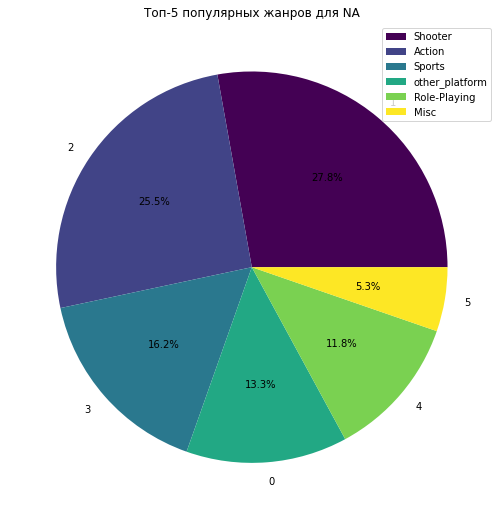

In [69]:
n_g_concat.plot(kind='pie',
                  x='genre',
                  y='na_sales', cmap='viridis', figsize=(9,9),autopct='%1.1f%%', 
               title='Топ-5 популярных жанров для NA')

ax = plt.gca()
ax.axes.yaxis.set_visible(False) 
ax.legend(labels=['Shooter', 'Action', 'Sports', 'other_platform', 'Role-Playing', 'Misc'])

На 5 популярных жанров приходятся чуть меньше 90% всех продаж в Северной Америке. Самый популярный жанр - Shooter, на него приходятся почти треть продаж, чуть меньше - Action. Не так популярны Role-Playing и Misc.

In [70]:
eu_platforms = data_new.pivot_table(index='platform', 
               values='eu_sales', aggfunc=sum).sort_values(by='eu_sales', ascending=False).reset_index()

eu_platforms

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


In [71]:
# другие платформы
other_platforms_list = ['PSP', 'Wii', 'PSV', 'X360', 'WiiU']
other_platform_sales = eu_platforms[eu_platforms['platform'].isin(other_platforms_list)]['eu_sales'].sum()
other_platforms = pd.DataFrame({'platform': ['other_platform'], 'eu_sales': [other_platform_sales]})

# платформы, которые оставляем без изменений
common_platforms = eu_platforms[~eu_platforms['platform'].isin(other_platforms_list)]

# объединяем датафреймы
df2_concat = pd.concat([other_platforms, common_platforms], ignore_index=True)

In [72]:
eu_p_concat = df2_concat.sort_values(by='eu_sales', ascending=False)
eu_p_concat

,platform,eu_sales
1,PS4,130.04
2,XOne,46.25
0,other_platform,34.76
3,PS3,25.54
4,PC,17.97
5,3DS,16.12


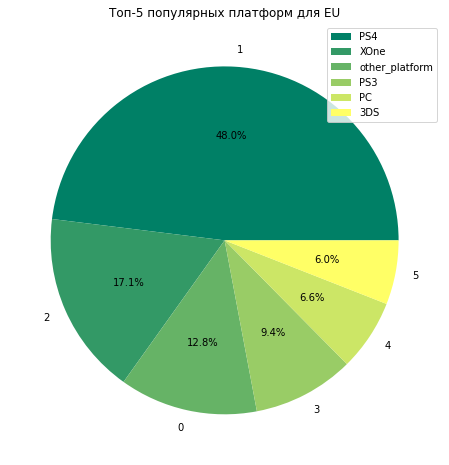

In [73]:
eu_p_concat.plot(kind='pie',
                  x='platform',
                  y='eu_sales', cmap='summer', figsize=(8,8),autopct='%1.1f%%', 
               title='Топ-5 популярных платформ для EU')

ax = plt.gca()
ax.axes.yaxis.set_visible(False) 
ax.legend(labels=['PS4', 'XOne', 'other_platform', 'PS3', 'PC', '3DS'])

В Европе на пять популярных жанров приходится чуть меньше 90% продаж в регионе. Причем, практически половина продаж приходятся на PS4, это платформа опережает остальные популярные платформы. На XOne, вторую по популярности платформу, приходится чуть меньше 20% продаж. На остальные популярные платформы - PS3, PC, 3DS в сокопуности приходится 22%.

In [74]:
eu_genre = data_new.pivot_table(index='genre', 
               values='eu_sales', aggfunc=sum).sort_values(by='eu_sales', ascending=False).reset_index()

eu_genre

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Misc,12.86
6,Simulation,7.30
7,Platform,6.80
8,Fighting,6.69
9,Adventure,6.49


In [75]:
# другие платформы
other_genre_list = ['Puzzle', 'Strategy', 'Simulation', 'Adventure', 'Platform', 'Misc', 'Fighting']
other_genre_sales = eu_genre[eu_genre['genre'].isin(other_genre_list)]['eu_sales'].sum()
other_genre = pd.DataFrame({'genre': ['other_genre'], 'eu_sales': [other_genre_sales]})

# платформы, которые оставляем без изменений
common_genre = eu_genre[~eu_genre['genre'].isin(other_genre_list)]

# объединяем датафреймы
df2_concat = pd.concat([other_genre, common_genre], ignore_index=True)

In [76]:
eu_g_concat = df2_concat.sort_values(by='eu_sales', ascending=False)
eu_g_concat

,genre,eu_sales
1,Action,74.68
2,Shooter,65.52
3,Sports,45.73
0,other_genre,42.45
4,Role-Playing,28.17
5,Racing,14.13


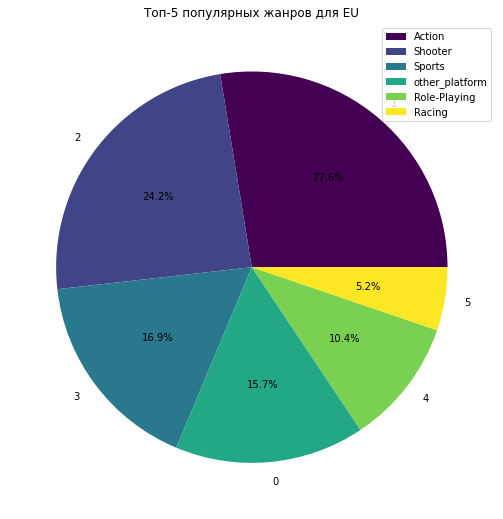

In [77]:
eu_g_concat.plot(kind='pie',
                  x='genre',
                  y='eu_sales', cmap='viridis', 
                 figsize=(9,9),autopct='%1.1f%%', 
               title='Топ-5 популярных жанров для EU')

ax = plt.gca()
ax.axes.yaxis.set_visible(False) 
ax.legend(labels=['Action', 'Shooter', 'Sports', 
                  'other_platform', 'Role-Playing', 'Racing'])

На топ-5 популярных жанров в Европе приходятся около 85% продаж. Почти треть продаж занимает Action, самый популярный жанр. Чуть меньше, на несколько процентных пунктов, - Shooter. Sports, Role-Playing, Racing не так популярны.

In [78]:
jp_platforms = data_new.pivot_table(index='platform', 
               values='jp_sales', 
            aggfunc=sum).sort_values(by='jp_sales', 
                                     ascending=False).reset_index()

jp_platforms

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


In [79]:
# другие платформы
other_platforms_list = ['Wii', 'PC', 'X360', 'XOne', 'PSP']
other_platform_sales = jp_platforms[jp_platforms['platform'].\
                isin(other_platforms_list)]['jp_sales'].sum()
other_platforms = pd.DataFrame({'platform': ['other_platform'],\
                                'jp_sales': [other_platform_sales]})

# платформы, которые оставляем без изменений
common_platforms = jp_platforms[~jp_platforms['platform'].isin(other_platforms_list)]

# объединяем датафреймы
df3_concat = pd.concat([other_platforms, common_platforms], ignore_index=True)

In [80]:
jp_p_concat = df3_concat.sort_values(by='jp_sales', ascending=False)
jp_p_concat

,platform,jp_sales
1,3DS,44.24
2,PS4,15.02
3,PSV,14.54
4,PS3,11.22
5,WiiU,7.31
0,other_platform,0.76


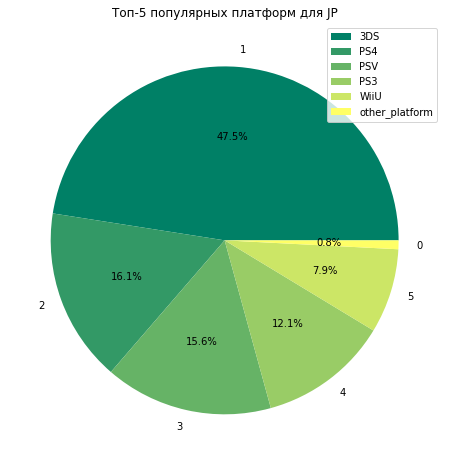

In [81]:
jp_p_concat.plot(kind='pie',
                  x='platform',
                  y='jp_sales', cmap='summer', figsize=(8,8),autopct='%1.1f%%', 
               title='Топ-5 популярных платформ для JP')

ax = plt.gca()
ax.axes.yaxis.set_visible(False) 
ax.legend(labels=['3DS', 'PS4', 'PSV', 'PS3', 'WiiU', 'other_platform'])

На 5 популярных платформ в Японии приходятся 99 % продаж: 3DS, PS4, PSV, PS3, WiiU.
На 3DS приходятся практически половина всех продаж, гораздо меньше на остальные платформы. PS4 и PSV занимают в среднем по 15%, остальные две платформы - ещё меньше.

In [82]:
jp_genre = data_new.pivot_table(index='genre', 
               values='jp_sales', aggfunc=sum).sort_values(by='jp_sales', ascending=False).reset_index()

jp_genre

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Adventure,3.60
6,Sports,3.26
7,Platform,2.69
8,Simulation,2.31
9,Racing,1.76


In [83]:
# другие платформы
other_genre_list = ['Puzzle', 'Strategy', 'Racing', 'Simulation', 'Platform', 'Sports', 'Adventure']
other_genre_sales = jp_genre[jp_genre['genre'].isin(other_genre_list)]['jp_sales'].sum()
other_genre = pd.DataFrame({'genre': ['other_genre'], 'jp_sales': [other_genre_sales]})

# платформы, которые оставляем без изменений
common_genre = jp_genre[~jp_genre['genre'].isin(other_genre_list)]

# объединяем датафреймы
df4_concat = pd.concat([other_genre, common_genre], ignore_index=True)

In [84]:
jp_g_concat = df4_concat.sort_values(by='jp_sales', ascending=False)
jp_g_concat

,genre,jp_sales
1,Role-Playing,31.16
2,Action,29.58
0,other_genre,15.50
3,Fighting,6.37
4,Misc,5.61
5,Shooter,4.87


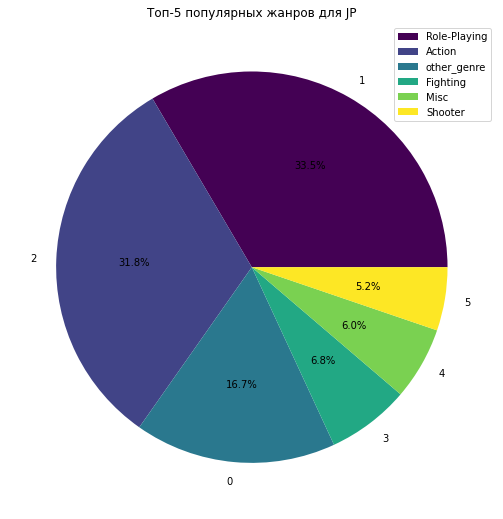

In [85]:
jp_g_concat.plot(kind='pie',
                  x='genre',
                  y='jp_sales', cmap='viridis', 
                 figsize=(9,9),autopct='%1.1f%%', 
               title='Топ-5 популярных жанров для JP')

ax = plt.gca()
ax.axes.yaxis.set_visible(False) 
ax.legend(labels=['Role-Playing', 'Action', 'other_genre', 
                  'Fighting', 'Misc', 'Shooter'])

На 5 популярных жанров приходятся около 85% всех продаж в Японии. Треть продаж занимают игры в жанре Role-Playing, примерно столько же - жанр Action. Остальные платформы популярны меньше. 

Топ-5 популярных платформ для Северной Америки: PS4, XOne, X360, 3DS, PS3

Топ-5 популярных жанров: Shooter, Action, Sports, Role-Playing, Misc

Топ-5 популярных платформ для Европы: PS4, XOne, PS3, PC, 3DS

Топ-5 популярных жанров: Action, Shooter, Sports, Role-Playing, Racing

Топ-5 популярных платформ для Японии: 3DS, PS4, PSV, PS3, WiiU

Топ-5 популярных жанров: Role-Playing, Action, Fighting, Misc, Shooter

У пользователей из Северной Америки и Европы схожие популярные платформы и популярные жанры. По платформам на первых местах - PS4, XOne. По жанрам лидируют шутеры и экш-игры. 
У пользователей из Японии отличные от других регионов предпочтения. На платформу 3DS приходятся почти 50% от общего количества всех продаж в регионах. Треть продажи приходит на ролевые игры, которые не так популярны в Америке и Европе, что можно объяснить культурными особенностями страны.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Рейтинг:
- «EC» («Early childhood») — «Для детей младшего возраста».
- «E» («Everyone») — «Для всех».
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
- «T» («Teen») — «Подросткам».
- «M» («Mature») — «Для взрослых».
- «AO» («Adults Only 18+») — «Только для взрослых».
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [86]:
data_new.pivot_table(index='rating',values=('na_sales', 'eu_sales', 
                    'jp_sales'), aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
whithout_rat,58.95,56.90,64.72


Text(0, 0.5, 'Кол-во продаж')

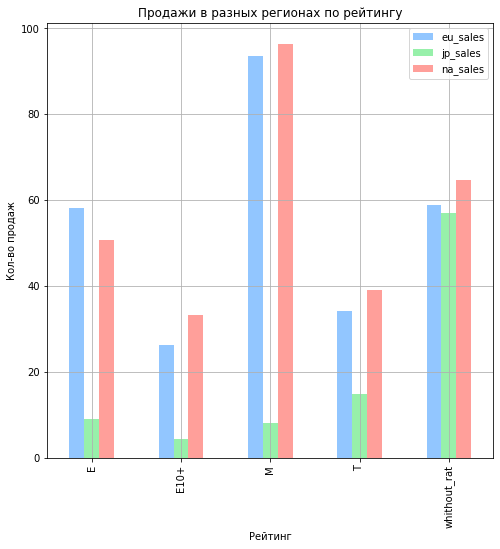

In [87]:
data_new.pivot_table(index='rating',values=('na_sales', 'eu_sales', 
                    'jp_sales'), aggfunc='sum').reset_index().plot(kind='bar', x ='rating', figsize=(8,8), grid=True)
plt.title('Продажи в разных регионах по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во продаж')

В Северной Америке и Европе лидируют со значительным отрывом игры, рассчитанные на взрослую аудиторию.
На втором месте - игры без рейтинг ESRB.
На третьем месте - игры рассчитанные на любую аудиторию.
В Японии распределение продаж по рейтингу немного отличается: с отрывом лидируют продажи игры без рейтинга, затем идут игры для подростков и игры для всех.
Можно предположить, что рейтинг влияет на продажи игр по регионам, но много продаж игр и без рейтинга.
ESRB используется в США и Канаде. В Японии есть своя собственная рейтинговая система компьютерных игр — CERO (Computer Entertainment Rating Organization).

**В ходе составления портрета пользователя каждого региона, можно сделать следующие выводы:**

На долю 5 популярных платформ Северной Америки приходятся почти 90% всех продаж в регионе. Более трети занимает PS4. Чуть меньше - XOne. Другие 3 платформы не так популярны. На 5 популярных жанров приходятся чуть меньше 90% всех продаж в Северной Америке. Самый популярный жанр - Shooter, на него приходятся почти треть продаж, чуть меньше - Action. Не так популярны Role-Playing и Misc.

В Европе схожее распределение, около 90% продаж приходятся на популярные платформы. Топ-5 платформ: PS4, XOne, PS3, PC, 3DS. Почти половина продаж - на PS4.
На топ-5 популярных жанров в Европе приходятся около 85% продаж. Почти треть продаж занимает Action, самый популярный жанр. Чуть меньше, на несколько процентных пунктов, - Shooter. Sports, Role-Playing, Racing не так популярны.


На 5 популярных платформ в Японии приходятся 99 % продаж: 3DS, PS4, PSV, PS3, WiiU. Популярные жанры: Role-Playing, Action, Fighting, Misc, Shooter. В Японии популярны ролевые игры и не очень популярны шутеры, тогда как в Европе и Америке все наоборот.

В Северной Америке и Европе лидируют со значительным отрывом игры, рассчитанные на взрослую аудиторию.В Японии распределение продаж по рейтингу немного отличается: с отрывом лидируют продажи игры без рейтинга.
Можно предположить, что рейтинг влияет на продажи игр по регионам, но много продаж игр и без рейтинга.

#### Шаг 5. Проверьте гипотезы

**Первая проверка.**

**Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC неодинаковые.

Нулевая гипотеза всегда строится со знаком равенства, альтернативная со знаком неравенства или знаком больше/меньше, в зависимости от того, что нужно проверить.

Уровень статистической значимость взят 5 %, обычно это стандартный уровень +  1 % преподлагает высокий уровень строгости к проверке гипотезы и может привести к увеличению вероятности ошибки второго рода (принять неверную нулевую гипотезу). 

Я предположила, что 5 % наиболее оптимальное решение.

Для корректной проверки гипотез нужно удалить пропуски в user_score

In [88]:
data_new_without_na = data_new.dropna(subset=['user_score'])

In [89]:
data_new_without_na['user_score'].isna().sum()

0

In [90]:
XOne=data_new_without_na.query('platform=="XOne"')
PC=data_new_without_na.query('platform=="PC"')

In [91]:
alpha = 0.05 
results = st.ttest_ind(XOne['user_score'], PC['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу:средние пользовательские рейтинги платформ Xbox One и PC неодинаковые')
else:
    print('Не получилось отвергнуть нулевую гипотезу:средние пользовательские рейтинги платформ Xbox One и PC одинаковые') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу:средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Так как p-value больше уровня статистической значимость, нулевую гипотезу отвергнуть нельзя: с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.  

**Вторая проверка.**

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равные.

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Уровень статистической значимость взят 5 %.

In [92]:
Action=data_new_without_na.query('genre=="Action"')
Sports=data_new_without_na.query('genre=="Sports"')

In [93]:
alpha = 0.05 
results = st.ttest_ind(Action['user_score'], Sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров не равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров равны') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров не равны


Так как p-value гораздно меньше уровня статистической значимость, нулевую гипотезу отвергаем. Можно предположить, что средние пользовательский рейтинги игр в жанре экшена и спортивных соревнований неравны.

**В ходе проверки гипотез:**

1) не удалось отвергнуть гипотезу о равенстве пользовательских рейтингов платформ Xbox One и PC;

2) отвергнута гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports.

#### Общий вывод:

В ходе работы были выполнены следующие задачи:

1) Осуществлена предобработка данных:
- названия столбцов приведены к нижнему регистру;
- преобразованы данные в нужный тип: year_of_release в int, user_score в float;
- удалены пропуски в столбцах name, genre, year_of_release;
- в столбце rating вместо пропусков добавлено значение Without_rat;
- добавлен новый столбец all_sales (количество мировых продаж).

2) Проведен исследовательский анализ данных, в ходе которого построен ряд графиков разных типов и сделаны следующие выводы:

- абсолютное большинство игр было выпущено после 2000 года;
- период "жизни" платформы около 10 лет, но период активных продаж – около 3-х лет. Для дальнейшего анализа определен актуальный период: с 2014 года;
- построен график распределения количества продаж по платформам, а также график с динамикой роста и падением продаж по платформам за актуальный период. В целом, у всех платформ к 2016 году наблюдается спад продаж. Более-менее активной остается PS4, ее можно назвать перспективной платформой. Еще можно указать XOne, она, хоть и меньше, но принесла продажи в 2016 году;
- построена диаграмма размаха ("ящик с усами"), по которой видно: у платформ XOne и WiiU почти не наблюдается выбросов, у остальных платформ есть аномально большие значения, особенно у Wii, X360, PS3. Скорее всего, это связано с особенностями игровой индустрии, где часто наблюдаются всплески продаж с выходом хитов/ожидаемых/популярных игр;
- построены диаграммы рассеяния для пяти популярных платформ с зависимостью между продажами и отзывами пользователей, а также продажами и оценками критиков;
- построен график распределения жанров по количеству продаж. По продажам лидируют такие жанры, как: Shooter, Sports, Platform. Причем шутеры очень сильно обгоняют спортивные и платформенные игры. На последнем месте - Adventure, Puzzle, Strategy.


3) Составлен портрет пользователя каждого региона: Северной Америки, Европы, Японии с топ-5 популярных жанров и популярных платформ, а также определено влияние рейтинга компьютерной игры на количество продаж. 

На долю 5 популярных платформ Северной Америки приходятся почти 90% всех продаж в регионе. Более трети занимает PS4. Чуть меньше - XOne. Другие 3 платформы не так популярны. На 5 популярных жанров приходятся чуть меньше 90% всех продаж в Северной Америке. Самый популярный жанр - Shooter, на него приходятся почти треть продаж, чуть меньше - Action. Не так популярны Role-Playing и Misc.

В Европе схожее распределение, около 90% продаж приходятся на популярные платформы. Топ-5 платформ: PS4, XOne, PS3, PC, 3DS. Почти половина продаж - на PS4.
На топ-5 популярных жанров в Европе приходятся около 85% продаж. Почти треть продаж занимает Action, самый популярный жанр. Чуть меньше, на несколько процентных пунктов, - Shooter. Sports, Role-Playing, Racing не так популярны.


На 5 популярных платформ в Японии приходятся 99 % продаж: 3DS, PS4, PSV, PS3, WiiU. Популярные жанры: Role-Playing, Action, Fighting, Misc, Shooter. В Японии популярны ролевые игры и не очень популярны шутеры, тогда как в Европе и Америке все наоборот.

В Северной Америке и Европе лидируют со значительным отрывом игры, рассчитанные на взрослую аудиторию.В Японии распределение продаж по рейтингу немного отличается: с отрывом лидируют продажи игры без рейтинга.
Можно предположить, что рейтинг влияет на продажи игр по регионам, но много продаж игр и без рейтинга.

4) Проверено несколько гипотез: 

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В ходе проверки гипотез:

1. не удалось отвергнуть гипотезу о равенстве пользовательских рейтингов платформ Xbox One и PC;

2. отвергнута гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports.



Закономерность, которые могут помочь определить успешность игры и построить кампанию на следующий год: платформы существуют в среднем не более 10 лет, активные продажи не превышают 3-х лет, нужно определить несколько популярных платформ по динамике роста продаж. Отзывы пользователей и оценка критиков не сильно влияют на продажи, на это можно не сильно ориентироваться. Самый популярный жанр - Shooters. Так как интернет-магазине «Стримчик» продает компьютерные по всему миру следует учитывать разность культурных особенностей, которые влияют на жанры, которым пользователи из разных регионов отдают предпочтение. В Японии очень ценятся игры role-playing и не так много поклонников шутер-игр. Платформы пользователей из разных регионов тоже отличаются, это необходимо учитывать. Рейтинг игры влияет на ее продажи ограничено, можно обратить внимание на игры рейтинга E и игры для взрослых, однако много игр не имеют рейтинга ESRB.
